# Data Exploration Analysis (EDA)

This notebook provides insights to create a regression/classification model to predict the scores of movies (```imdb_score```)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get working directory
os.getcwd()

'/home/victor/Documentos/data-analysis-projects/programaria/imdb/src'

In [3]:
# Read data
imdb = pd.read_csv('../data/movie_metadata.csv')

In [4]:
# Inspecting type of columns
imdb.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
# Inspecting data
imdb.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [6]:
# Adding the imdb_score categorized
imdb['categorical_imdb_score'] = pd.cut(imdb['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False) + 1

In [7]:
# Removing uninformative column
imdb.drop(['movie_imdb_link', 'movie_title'], axis=1, inplace=True)

In [8]:
# Summarizing missing columns
imdb.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
cast_total_facebook_likes      0
num_voted_users                0
genres                         0
imdb_score                     0
categorical_imdb_score         0
dtype: int64

## Manipulating categorical variables

Notice that ```genres``` and ```plot_keywords``` have multiple categories for the same movies, in order to make this information usable to inspect the relation between ```imdb_score``` variables let's transform each of them in dummy variables

In [ ]:
# genres variable
genres = imdb['genres'].str.get_dummies()

# plot_keywords variable
plot_keywords = imdb['plot_keywords'].str.get_dummies()


## Analysis of ```imdb_score``` variables

In [ ]:
# Distribution of imdb_score
hist = ggplot(imdb, aes(x='imdb_score')) +\
    geom_histogram()

qq_plot = ggplot(imdb, aes(sample='imdb_score')) +\
    geom_qq() +\
    geom_qq_line()

print(hist)
print(qq_plot)

As we see the above graphics, the distribution of ```imdb_score``` is not even close to normal, let's apply the Boxcox transformation to approximate to the normal distribution 

In [122]:
# Boxcox transformation of imdb_score
bc = stats.boxcox(np.array(imdb['imdb_score']))
imdb['bc_imdb_score'] = bc[0]

# Lambda value
bc[1]

2.16803355845599

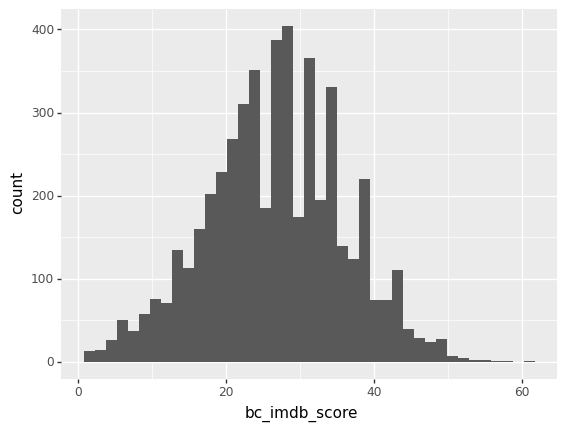

<ggplot: (8748923560417)>


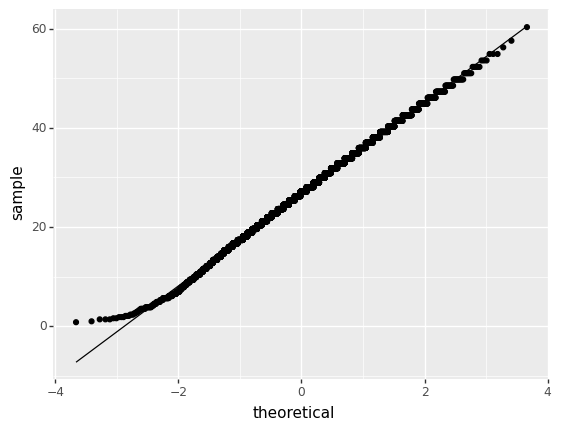

<ggplot: (8748923537714)>


In [123]:
# Distribution of bc_imdb_score
hist = ggplot(imdb, aes(x='bc_imdb_score')) +\
    geom_histogram()

qq_plot = ggplot(imdb, aes(sample='bc_imdb_score')) +\
    geom_qq() +\
    geom_qq_line()

print(hist)
print(qq_plot)


In [124]:
# Distribution of categorical_imdb_score
imdb['categorical_imdb_score'].value_counts()

3    3205
2    1411
4     253
1     174
Name: categorical_imdb_score, dtype: int64

## Relation between ```categorical_imdb_score``` and other variables

### Categorical variables

In [160]:
# Selecting only categorical variables
categorical = imdb.select_dtypes(include=['object'])

# Auxiliary parameteres for figure
n_vars = len(categorical) - 1
n_row = np.ceil(np.sqrt(n_vars))
i = 1

fig = plt.figure(figsize=(15, 15))

#for var in quantitative:
#    if var != 'categorical_imdb_score':
#        ax = fig.add_subplot(n_row, n_row, i)
#        sns.boxplot(x='categorical_imdb_score', y=var, data=imdb)
#        plt.xlabel("")
#        i += 1
#fig.tight_layout(pad=.5)
#plt.show()

color      director_name      actor_2_name  \
0     Color      James Cameron  Joel David Moore   
1     Color     Gore Verbinski     Orlando Bloom   
2     Color         Sam Mendes      Rory Kinnear   
3     Color  Christopher Nolan    Christian Bale   
4       NaN        Doug Walker        Rob Walker   
...     ...                ...               ...   
5038  Color        Scott Smith     Daphne Zuniga   
5039  Color                NaN     Valorie Curry   
5040  Color   Benjamin Roberds     Maxwell Moody   
5041  Color        Daniel Hsia     Daniel Henney   
5042  Color           Jon Gunn  Brian Herzlinger   

                               genres     actor_1_name  \
0     Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1            Action|Adventure|Fantasy      Johnny Depp   
2           Action|Adventure|Thriller  Christoph Waltz   
3                     Action|Thriller        Tom Hardy   
4                         Documentary      Doug Walker   
...                               ...              ...   
5038                     Comedy|Drama      Eric Mabius   
5039     Crime|Drama|Mystery|Thriller      Natalie Zea   
5040            Drama|Horror|Thriller      Eva Boehnke   
5041             Comedy|Drama|Romance        Alan Ruck   
5042                      Documentary      John August   

                                            movie_title          actor_3_name  \
0                                               Avatar              Wes Studi   
1             Pirates of the Caribbean: At World's End         Jack Davenport   
2                                              Spectre       Stephanie Sigman   
3                                The Dark Knight Rises   Joseph Gordon-Levitt   
4     Star Wars: Episode VII - The Force Awakens    ...                   NaN   
...                                                 ...                   ...   
5038                           Signed Sealed Delivered           Crystal Lowe   
5039                         The Following                      Sam Underwood   
5040                              A Plague So Pleasant         David Chandler   
5041                                  Shanghai Calling            Eliza Coupe   
5042                                 My Date with Drew               Jon Gunn   

                                          plot_keywords language country  \
0                avatar|future|marine|native|paraplegic  English     USA   
1     goddess|marriage ceremony|marriage proposal|pi...  English     USA   
2                   bomb|espionage|sequel|spy|terrorist  English      UK   
3     deception|imprisonment|lawlessness|police offi...  English     USA   
4                                                   NaN      NaN     NaN   
...                                                 ...      ...     ...   
5038             fraud|postal worker|prison|theft|trial  English  Canada   
5039       cult|fbi|hideout|prison escape|serial killer  English     USA   
5040                                                NaN  English     USA   
5041                                                NaN  English     USA   
5042  actress name in title|crush|date|four word tit...  English     USA   

     content_rating  
0             PG-13  
1             PG-13  
2             PG-13  
3             PG-13  
4               NaN  
...             ...  
5038            NaN  
5039          TV-14  
5040            NaN  
5041          PG-13  
5042             PG  

[5043 rows x 11 columns]

<Figure size 1080x1080 with 0 Axes>

### Quantitative variables

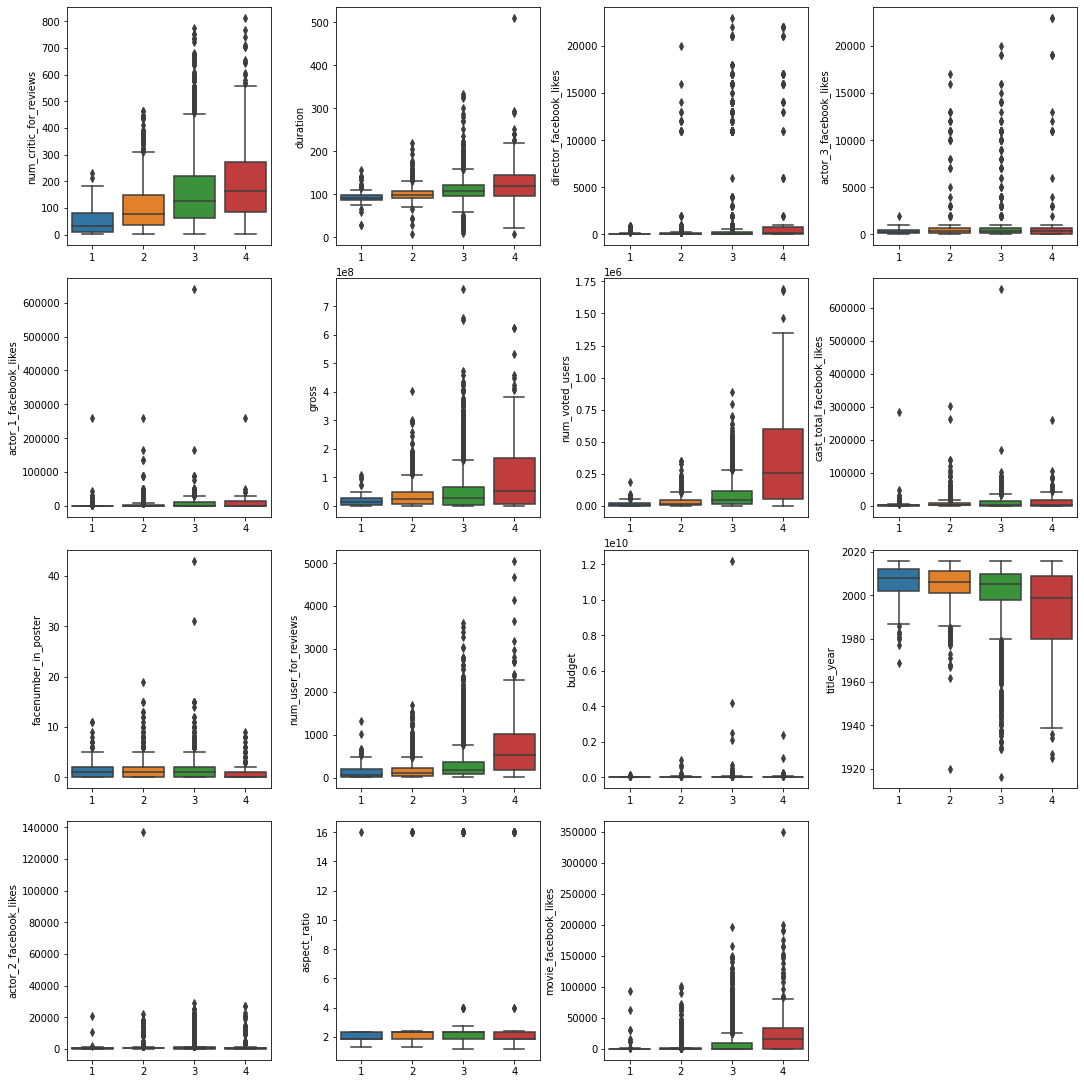

In [159]:
# Selecting only quantitative variables
quantitative = imdb.select_dtypes(include=['float64', 'int64']).drop(['imdb_score', 'bc_imdb_score'], axis=1).columns.tolist()

# Auxiliary parameteres for figure
n_vars = len(quantitative) - 1
n_row = np.ceil(np.sqrt(n_vars))
i = 1

fig = plt.figure(figsize=(15, 15))

for var in quantitative:
    if var != 'categorical_imdb_score':
        ax = fig.add_subplot(n_row, n_row, i)
        sns.boxplot(x='categorical_imdb_score', y=var, data=imdb)
        plt.xlabel("")
        i += 1
fig.tight_layout(pad=.5)
plt.show()